# Testing if a Distribution is Normal

### Imports

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


# Set plotting options 
%matplotlib inline 
plt.rc('figure', figsize=(16,9))

### Create normal and non-normal distributions

In [3]:
# Sample A: Normal distribution
sample_a = stats.norm.rvs(loc=0.0, scale=1.0, size=(1000,))

# Sample B: Non-normal distribution
sample_b = stats.lognorm.rvs(s=0.5, scale=1.0, size=(1000,))

### Boxplot-Whisker Plot and Histogram

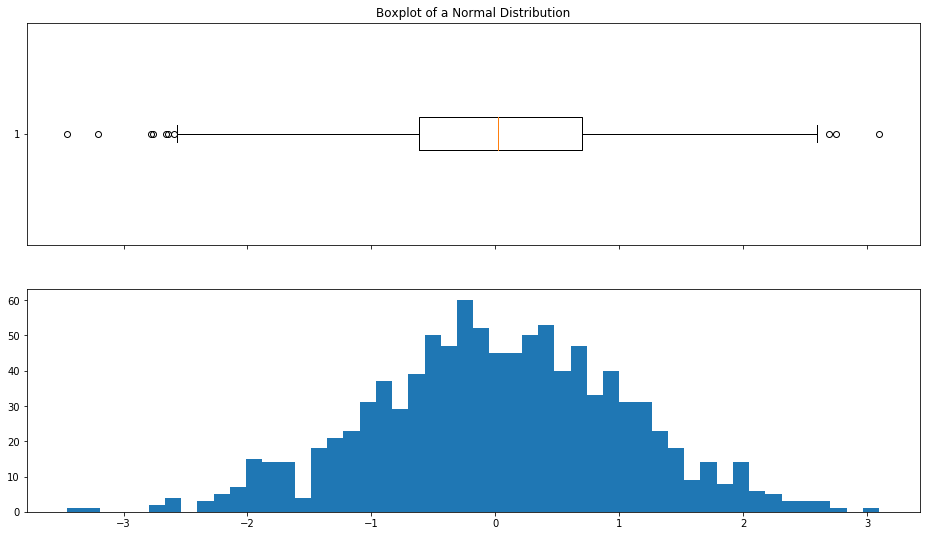

In [8]:
# Sample A: Normal distribution
sample_a = stats.norm.rvs(loc=0.0, scale=1.0, size=(1000,))
fig, axes = plt.subplots(2, 1, figsize=(16, 9), sharex=True)
axes[0].boxplot(sample_a, vert=False)
axes[1].hist(sample_a, bins=50)
axes[0].set_title("Boxplot of a Normal Distribution");

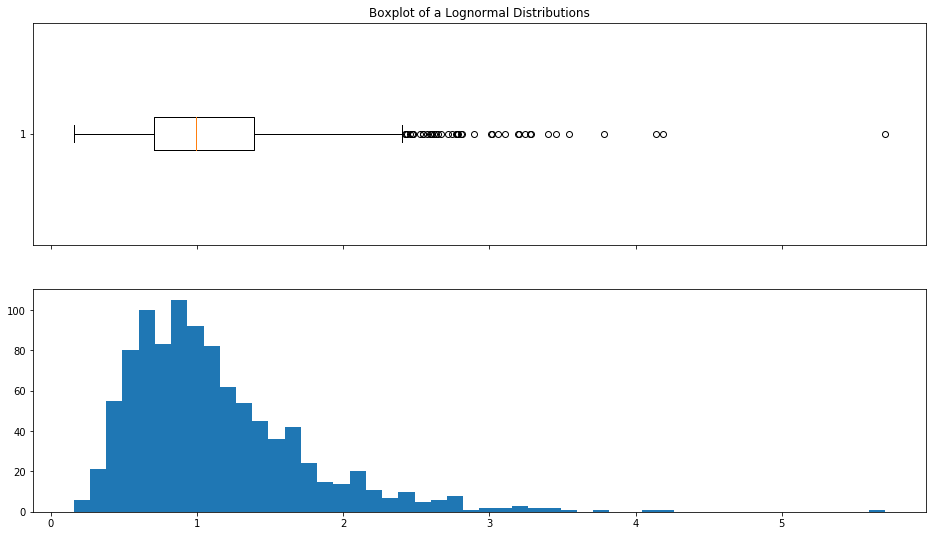

In [7]:
# Sample B: Non-normal distribution
sample_b = stats.lognorm.rvs(s=0.5, scale=1.0, size=(1000,))
fig, axes = plt.subplots(2, 1, figsize=(16,9), sharex=True)
axes[0].boxplot(sample_b, vert=False)
axes[1].hist(sample_b, bins=50)
axes[0].set_title("Boxplot of a Lognormal Distributions");

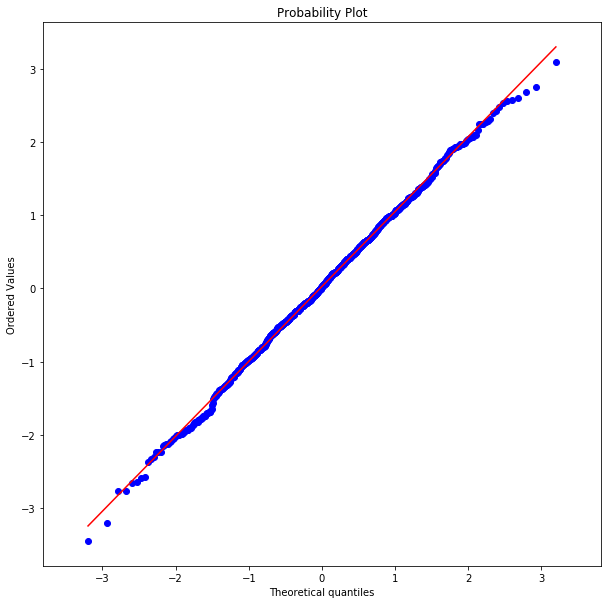

In [10]:
# Q-Q plot of normally-distributed sample 
plt.figure(figsize=(10,10)); plt.axis('equal')
stats.probplot(sample_a, dist='norm', plot=plt);

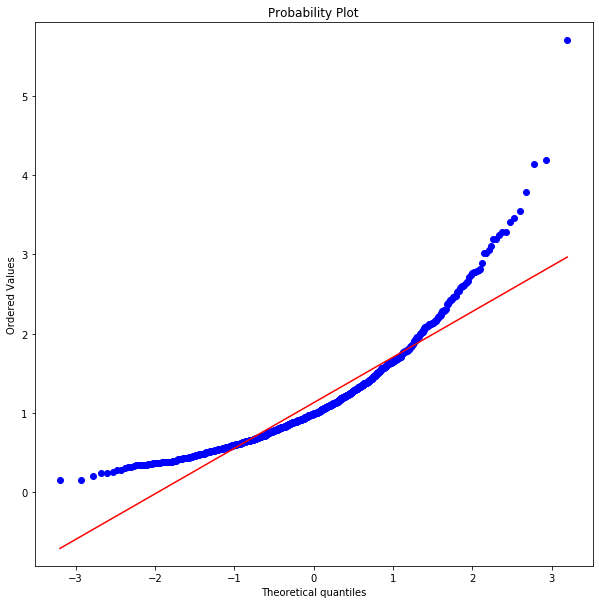

In [12]:
# Q-Q plot of non-normally-distributed sample
plt.figure(figsize=(10, 10)); plt.axis('equal')
stats.probplot(sample_b, dist='norm', plot=plt);

### Testing for  Normality

#### Shapiro-Wilko

In [14]:
def is_normal(sample, test=stats.shapiro, p_level=0.05, **kwargs):
    """Apply a normality test to check if a sample is normally distributed"""
    t_stat, p_value = test(sample, **kwargs)
    print("Test statistics: {}, p-value: {}".format(t_stat, p_value))
    print("Is the distribution likely Normal? {}".format(p_value > p_level))
    return p_value > p_level


# Using Shapiro-Wilk test
print("Sample A:-"); is_normal(sample_a);
print("Sample B:-"); is_normal(sample_b);

Sample A:-
Test statistics: 0.9986812472343445, p-value: 0.6759243011474609
Is the distribution likely Normal? True
Sample B:-
Test statistics: 0.8804098963737488, p-value: 4.776224217464714e-27
Is the distribution likely Normal? False
